
<div style="background-color: olive; padding: 40px; font-size: 40px;">
           Data Acquisition
    
    
</div>
  

Exploring a REST(Representational State Transfer) API that returns JSON data.

The end result of this exercise should be a file named acquire.py

Recall
The following are some "responses" that you may see when requesting APIs.

200- 206: Successful

401: Unauthorized

404: Not Found

500: Internal Server Error



In [171]:
import pandas as pd
import numpy as np
import requests
import os


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import datetime

#set figure size
plt.rcParams["figure.figsize"] = (8,6)


#specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exercises

## 1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.


In [ ]:
Using SWAPI

In [87]:
response = requests.get('https://swapi.dev/api/people/')
response

<Response [200]>

In [88]:
data = response.json()
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [89]:
base_url = "https://swapi.dev/api/"

ppl_url = base_url + "people/"

ppl_url


'https://swapi.dev/api/people/'

In [92]:
requests.get(ppl_url + "?page=1").json()['results'][0]['films']


['https://swapi.dev/api/films/1/',
 'https://swapi.dev/api/films/2/',
 'https://swapi.dev/api/films/3/',
 'https://swapi.dev/api/films/6/']

In [93]:
requests.get(ppl_url + "?page=1").json()['results'][0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [94]:
requests.get(ppl_url + "?page=1").json()

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [95]:
for i in range(3):
    print(ppl_url + f"?page={i+1}")

https://swapi.dev/api/people/?page=1
https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3


In [96]:
import math
from pprint import pprint

In [97]:
page_results = []

data1 = requests.get(ppl_url + "?page=1").json()

number_of_people = data1['count']
number_of_results = len(data1['results'])

max_page = math.ceil(number_of_people / number_of_results)
#print(max_page)

for i in range(max_page):
    ppl_pg = ppl_url + f"?page={i+1}"
    #print(ppl_pg)
    data = requests.get(ppl_pg).json()
    #print(data['results'])
    for r in range(len(data['results'])):
        person = data['results'][r]
        page_results.append(person)
#pprint(page_results)

ppl_df = pd.DataFrame(page_results)

In [98]:
ppl_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [99]:
ppl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        82 non-null     object
 1   height      82 non-null     object
 2   mass        82 non-null     object
 3   hair_color  82 non-null     object
 4   skin_color  82 non-null     object
 5   eye_color   82 non-null     object
 6   birth_year  82 non-null     object
 7   gender      82 non-null     object
 8   homeworld   82 non-null     object
 9   films       82 non-null     object
 10  species     82 non-null     object
 11  vehicles    82 non-null     object
 12  starships   82 non-null     object
 13  created     82 non-null     object
 14  edited      82 non-null     object
 15  url         82 non-null     object
dtypes: object(16)
memory usage: 10.4+ KB


In [ ]:
# OR

In [85]:
response = requests.get('https://swapi.dev/api/')
response.text

'{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}'

In [86]:
data = response.json()
data

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

In [100]:
response = requests.get('https://swapi.dev/api/people/')


In [101]:
data = response.json()
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [69]:
data['count']

82

In [70]:
data['next']

'https://swapi.dev/api/people/?page=2'

In [71]:
data['previous']

In [72]:
data['results']

[{'name': 'Luke Skywalker',
  'height': '172',
  'mass': '77',
  'hair_color': 'blond',
  'skin_color': 'fair',
  'eye_color': 'blue',
  'birth_year': '19BBY',
  'gender': 'male',
  'homeworld': 'https://swapi.dev/api/planets/1/',
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/2/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/6/'],
  'species': [],
  'vehicles': ['https://swapi.dev/api/vehicles/14/',
   'https://swapi.dev/api/vehicles/30/'],
  'starships': ['https://swapi.dev/api/starships/12/',
   'https://swapi.dev/api/starships/22/'],
  'created': '2014-12-09T13:50:51.644000Z',
  'edited': '2014-12-20T21:17:56.891000Z',
  'url': 'https://swapi.dev/api/people/1/'},
 {'name': 'C-3PO',
  'height': '167',
  'mass': '75',
  'hair_color': 'n/a',
  'skin_color': 'gold',
  'eye_color': 'yellow',
  'birth_year': '112BBY',
  'gender': 'n/a',
  'homeworld': 'https://swapi.dev/api/planets/1/',
  'films': ['https://swapi.dev/api/films/1/',
 

In [73]:
len(data['results'])


10

In [74]:
number_of_people = data['count']
next_page = data['next']
previous_page = data['previous']

print(f'number_of_people: {number_of_people}')
print(f'next_page: {next_page}')
print(f'previous_page: {previous_page}')

number_of_people: 82
next_page: https://swapi.dev/api/people/?page=2
previous_page: None


In [75]:
import math

number_of_results = len(data['results'])
max_page = math.ceil(number_of_people / number_of_results)

print(f'number_of_results: {number_of_results}')
print(f'max_page: {max_page}')

number_of_results: 10
max_page: 9


In [77]:
people = pd.DataFrame(data['results'])
people


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


# 2. Do the same thing, but for planets.


## Using SWAPI

In [138]:
base_url

'https://swapi.dev/api/'

In [139]:
planet_url = base_url + "planets/"


In [140]:
response = requests.get(planet_url)
data = response.json()

In [141]:
planet_df = pd.DataFrame(data['results'])


In [142]:
planet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   rotation_period  10 non-null     object
 2   orbital_period   10 non-null     object
 3   diameter         10 non-null     object
 4   climate          10 non-null     object
 5   gravity          10 non-null     object
 6   terrain          10 non-null     object
 7   surface_water    10 non-null     object
 8   population       10 non-null     object
 9   residents        10 non-null     object
 10  films            10 non-null     object
 11  created          10 non-null     object
 12  edited           10 non-null     object
 13  url              10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [143]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [144]:
planet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


Takeaways:
Concatinating the additional pages onto the dataframe changed the shape from 10 entries (1 page), to 60 entries (6 pages)

In [ ]:
# 0R

In [52]:
response = requests.get('https://swapi.dev/api/')
print(response.text)

{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}


In [53]:
data = response.json()
data

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

In [54]:
response = requests.get('https://swapi.dev/api/planets/')


In [55]:
data = response.json()
data

{'count': 60,
 'next': 'https://swapi.dev/api/planets/?page=2',
 'previous': None,
 'results': [{'name': 'Tatooine',
   'rotation_period': '23',
   'orbital_period': '304',
   'diameter': '10465',
   'climate': 'arid',
   'gravity': '1 standard',
   'terrain': 'desert',
   'surface_water': '1',
   'population': '200000',
   'residents': ['https://swapi.dev/api/people/1/',
    'https://swapi.dev/api/people/2/',
    'https://swapi.dev/api/people/4/',
    'https://swapi.dev/api/people/6/',
    'https://swapi.dev/api/people/7/',
    'https://swapi.dev/api/people/8/',
    'https://swapi.dev/api/people/9/',
    'https://swapi.dev/api/people/11/',
    'https://swapi.dev/api/people/43/',
    'https://swapi.dev/api/people/62/'],
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/4/',
    'https://swapi.dev/api/films/5/',
    'https://swapi.dev/api/films/6/'],
   'created': '2014-12-09T13:50:49.641000Z',
   'edited': '2014-12-20T

In [56]:
count = data['count']
next_data = data['next']
previous = data['previous']
results =data['results']
print(count,next_data,previous,'results')

60 https://swapi.dev/api/planets/?page=2 None results


In [57]:
data['count']

60

In [58]:
data['next']

'https://swapi.dev/api/planets/?page=2'

In [59]:
data['previous']


In [60]:
data['results']

[{'name': 'Tatooine',
  'rotation_period': '23',
  'orbital_period': '304',
  'diameter': '10465',
  'climate': 'arid',
  'gravity': '1 standard',
  'terrain': 'desert',
  'surface_water': '1',
  'population': '200000',
  'residents': ['https://swapi.dev/api/people/1/',
   'https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/4/',
   'https://swapi.dev/api/people/6/',
   'https://swapi.dev/api/people/7/',
   'https://swapi.dev/api/people/8/',
   'https://swapi.dev/api/people/9/',
   'https://swapi.dev/api/people/11/',
   'https://swapi.dev/api/people/43/',
   'https://swapi.dev/api/people/62/'],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/4/',
   'https://swapi.dev/api/films/5/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-09T13:50:49.641000Z',
  'edited': '2014-12-20T20:58:18.411000Z',
  'url': 'https://swapi.dev/api/planets/1/'},
 {'name': 'Alderaan',
  'rotation_period': '24',
  'orb

In [61]:
len(data['results'])


10

In [62]:
number_of_people = data['count']
next_page = data['next']
previous_page = data['previous']

print(f'number_of_people: {number_of_people}')
print(f'next_page: {next_page}')
print(f'previous_page: {previous_page}')

number_of_people: 60
next_page: https://swapi.dev/api/planets/?page=2
previous_page: None


In [63]:
import math

number_of_results = len(data['results'])
max_page = math.ceil(number_of_people / number_of_results)

print(f'number_of_results: {number_of_results}')
print(f'max_page: {max_page}')

number_of_results: 10
max_page: 6


In [64]:
import pandas as pd

planets = pd.DataFrame(data['results'])
planets

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000,"[https://swapi.dev/api/people/34/, https://swa...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:54:13.921000Z,2014-12-20T20:58:18.432000Z,https://swapi.dev/api/planets/9/
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000,"[https://swapi.dev/api/people/22/, https://swa...",[https://swapi.dev/api/films/5/],2014-12-10T12:45:06.577000Z,2014-12-20T20:58:18.434000Z,https://swapi.dev/api/planets/10/


# 3. Extract the data for starships.


In [109]:
ships_url = base_url + "starships/"


In [111]:
response = requests.get(ships_url)
data=response.json()

In [112]:
starships_df= pd.DataFrame(data['results'])
starships_df.info()
starships_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    10 non-null     object
 1   model                   10 non-null     object
 2   manufacturer            10 non-null     object
 3   cost_in_credits         10 non-null     object
 4   length                  10 non-null     object
 5   max_atmosphering_speed  10 non-null     object
 6   crew                    10 non-null     object
 7   passengers              10 non-null     object
 8   cargo_capacity          10 non-null     object
 9   consumables             10 non-null     object
 10  hyperdrive_rating       10 non-null     object
 11  MGLT                    10 non-null     object
 12  starship_class          10 non-null     object
 13  pilots                  10 non-null     object
 14  films                   10 non-null     object
 15  created  

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


In [113]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [114]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

In [ ]:
# OR

## Using SWAPI

In [35]:
response = requests.get('https://swapi.dev/api/')
print(response.text)

{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}


In [36]:
data = response.json()
data

{'people': 'https://swapi.dev/api/people/',
 'planets': 'https://swapi.dev/api/planets/',
 'films': 'https://swapi.dev/api/films/',
 'species': 'https://swapi.dev/api/species/',
 'vehicles': 'https://swapi.dev/api/vehicles/',
 'starships': 'https://swapi.dev/api/starships/'}

In [37]:
response = requests.get('https://swapi.dev/api/starships/')


In [38]:
data = response.json()
data

{'count': 36,
 'next': 'https://swapi.dev/api/starships/?page=2',
 'previous': None,
 'results': [{'name': 'CR90 corvette',
   'model': 'CR90 corvette',
   'manufacturer': 'Corellian Engineering Corporation',
   'cost_in_credits': '3500000',
   'length': '150',
   'max_atmosphering_speed': '950',
   'crew': '30-165',
   'passengers': '600',
   'cargo_capacity': '3000000',
   'consumables': '1 year',
   'hyperdrive_rating': '2.0',
   'MGLT': '60',
   'starship_class': 'corvette',
   'pilots': [],
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'created': '2014-12-10T14:20:33.369000Z',
   'edited': '2014-12-20T21:23:49.867000Z',
   'url': 'https://swapi.dev/api/starships/2/'},
  {'name': 'Star Destroyer',
   'model': 'Imperial I-class Star Destroyer',
   'manufacturer': 'Kuat Drive Yards',
   'cost_in_credits': '150000000',
   'length': '1,600',
   'max_atmosphering_speed': '975',
   'crew': '47,060',
   'pass

In [39]:
data['count']

36

In [40]:
data['next']

'https://swapi.dev/api/starships/?page=2'

In [41]:
data['previous']

In [42]:
data['results']    

[{'name': 'CR90 corvette',
  'model': 'CR90 corvette',
  'manufacturer': 'Corellian Engineering Corporation',
  'cost_in_credits': '3500000',
  'length': '150',
  'max_atmosphering_speed': '950',
  'crew': '30-165',
  'passengers': '600',
  'cargo_capacity': '3000000',
  'consumables': '1 year',
  'hyperdrive_rating': '2.0',
  'MGLT': '60',
  'starship_class': 'corvette',
  'pilots': [],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-10T14:20:33.369000Z',
  'edited': '2014-12-20T21:23:49.867000Z',
  'url': 'https://swapi.dev/api/starships/2/'},
 {'name': 'Star Destroyer',
  'model': 'Imperial I-class Star Destroyer',
  'manufacturer': 'Kuat Drive Yards',
  'cost_in_credits': '150000000',
  'length': '1,600',
  'max_atmosphering_speed': '975',
  'crew': '47,060',
  'passengers': 'n/a',
  'cargo_capacity': '36000000',
  'consumables': '2 years',
  'hyperdrive_rating': '2.0',
  'MGLT': '60',
  

In [43]:
len(data['results'])


10

In [44]:
number_of_people = data['count']
next_page = data['next']
previous_page = data['previous']

print(f'number_of_people: {number_of_people}')
print(f'next_page: {next_page}')
print(f'previous_page: {previous_page}')

number_of_people: 36
next_page: https://swapi.dev/api/starships/?page=2
previous_page: None


In [45]:
import math

number_of_results = len(data['results'])
max_page = math.ceil(number_of_people / number_of_results)

print(f'number_of_results: {number_of_results}')
print(f'max_page: {max_page}')

number_of_results: 10
max_page: 4


In [51]:
import pandas as pd

starships = pd.DataFrame(data['results'])
starships

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,unknown,21.5,1000,1,6,70000,1 month,3.0,70,Patrol craft,[https://swapi.dev/api/people/22/],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T13:00:56.332000Z,2014-12-20T21:23:49.897000Z,https://swapi.dev/api/starships/21/
1,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,240000,20,850,6,20,80000,2 months,1.0,50,Armed government transport,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T13:04:47.235000Z,2014-12-20T21:23:49.900000Z,https://swapi.dev/api/starships/22/
2,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8500000,300,800,854,75,6000000,2 years,2.0,40,Escort ship,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-15T13:06:30.813000Z,2014-12-20T21:23:49.902000Z,https://swapi.dev/api/starships/23/
3,Calamari Cruiser,MC80 Liberty type Star Cruiser,Mon Calamari shipyards,104000000,1200,n/a,5400,1200,unknown,2 years,1.0,60,Star Cruiser,[],[https://swapi.dev/api/films/3/],2014-12-18T10:54:57.804000Z,2014-12-20T21:23:49.904000Z,https://swapi.dev/api/starships/27/
4,A-wing,RZ-1 A-wing Interceptor,"Alliance Underground Engineering, Incom Corpor...",175000,9.6,1300,1,0,40,1 week,1.0,120,Starfighter,[https://swapi.dev/api/people/29/],[https://swapi.dev/api/films/3/],2014-12-18T11:16:34.542000Z,2014-12-20T21:23:49.907000Z,https://swapi.dev/api/starships/28/
5,B-wing,A/SF-01 B-wing starfighter,Slayn & Korpil,220000,16.9,950,1,0,45,1 week,2.0,91,Assault Starfighter,[],[https://swapi.dev/api/films/3/],2014-12-18T11:18:04.763000Z,2014-12-20T21:23:49.909000Z,https://swapi.dev/api/starships/29/
6,Republic Cruiser,Consular-class cruiser,Corellian Engineering Corporation,unknown,115,900,9,16,unknown,unknown,2.0,unknown,Space cruiser,[],[https://swapi.dev/api/films/4/],2014-12-19T17:01:31.488000Z,2014-12-20T21:23:49.912000Z,https://swapi.dev/api/starships/31/
7,Droid control ship,Lucrehulk-class Droid Control Ship,"Hoersch-Kessel Drive, Inc.",unknown,3170,n/a,175,139000,4000000000,500 days,2.0,unknown,Droid control ship,[],"[https://swapi.dev/api/films/4/, https://swapi...",2014-12-19T17:04:06.323000Z,2014-12-20T21:23:49.915000Z,https://swapi.dev/api/starships/32/
8,Naboo fighter,N-1 starfighter,Theed Palace Space Vessel Engineering Corps,200000,11,1100,1,0,65,7 days,1.0,unknown,Starfighter,"[https://swapi.dev/api/people/11/, https://swa...","[https://swapi.dev/api/films/4/, https://swapi...",2014-12-19T17:39:17.582000Z,2014-12-20T21:23:49.917000Z,https://swapi.dev/api/starships/39/
9,Naboo Royal Starship,J-type 327 Nubian royal starship,"Theed Palace Space Vessel Engineering Corps, N...",unknown,76,920,8,unknown,unknown,unknown,1.8,unknown,yacht,[https://swapi.dev/api/people/39/],[https://swapi.dev/api/films/4/],2014-12-19T17:45:03.506000Z,2014-12-20T21:23:49.919000Z,https://swapi.dev/api/starships/40/


# 4.Save the data in your files to local csv files so that it will be faster to access in the future.


In [145]:
def get_swapi_data(endpoint):
    """
    This function will:  
    - creates a csv of `endpoint` data if one does not exist
        - if one already exists, it uses the existing csv 
    - outputs data as a dataframe.
    
    endpoint formatting: "planets"
    
    """
    
    base_url = "https://swapi.dev/api/"
    
    if os.path.isfile(f"{endpoint}.csv"):
        df = pd.read_csv(f"{endpoint}.csv", index_col=0)
        
    else:
        response = requests.get(base_url + endpoint + "/")
        data = response.json()
        df = pd.DataFrame(data['results'])
        
        while data['next'] != None:
            print(data['next'])
            response = requests.get(data['next'])
            data = response.json()
            df = pd.concat([df, pd.DataFrame(data['results'])], ignore_index=True)
        df.to_csv(f"{endpoint}.csv")
        
    return df

In [151]:
starship = get_swapi_data("starships")
starship.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,unknown,21.50,1000.00,1,6,70000,1 month,3.00,70,Patrol craft,['https://swapi.dev/api/people/22/'],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-15T13:00:56.332000Z,2014-12-20T21:23:49.897000Z,https://swapi.dev/api/starships/21/
1,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,240000,20.00,850.00,6,20,80000,2 months,1.00,50,Armed government transport,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-15T13:04:47.235000Z,2014-12-20T21:23:49.900000Z,https://swapi.dev/api/starships/22/
2,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8500000,300.00,800.00,854,75,6000000,2 years,2.00,40,Escort ship,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-15T13:06:30.813000Z,2014-12-20T21:23:49.902000Z,https://swapi.dev/api/starships/23/
3,Calamari Cruiser,MC80 Liberty type Star Cruiser,Mon Calamari shipyards,104000000,1200.00,NaN,5400,1200,unknown,2 years,1.00,60,Star Cruiser,[],['https://swapi.dev/api/films/3/'],2014-12-18T10:54:57.804000Z,2014-12-20T21:23:49.904000Z,https://swapi.dev/api/starships/27/
4,A-wing,RZ-1 A-wing Interceptor,"Alliance Underground Engineering, Incom Corpor...",175000,9.60,1300.00,1,0,40,1 week,1.00,120,Starfighter,['https://swapi.dev/api/people/29/'],['https://swapi.dev/api/films/3/'],2014-12-18T11:16:34.542000Z,2014-12-20T21:23:49.907000Z,https://swapi.dev/api/starships/28/


In [134]:
starship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    10 non-null     object 
 1   model                   10 non-null     object 
 2   manufacturer            10 non-null     object 
 3   cost_in_credits         10 non-null     object 
 4   length                  10 non-null     float64
 5   max_atmosphering_speed  8 non-null      float64
 6   crew                    10 non-null     int64  
 7   passengers              10 non-null     object 
 8   cargo_capacity          10 non-null     object 
 9   consumables             10 non-null     object 
 10  hyperdrive_rating       10 non-null     float64
 11  MGLT                    10 non-null     object 
 12  starship_class          10 non-null     object 
 13  pilots                  10 non-null     object 
 14  films                   10 non-null     object 
 1

In [152]:
people = get_swapi_data("people")
people.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],['https://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],['https://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [153]:
planet = get_swapi_data("planets")
planet.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],['https://swapi.dev/api/films/2/'],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,NaN,"swamp, jungles",8,unknown,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [ ]:
# OR

In [78]:
# Save the 'people' DataFrame to 'people.csv' file
people.to_csv('people.csv', index=True)
# Save the 'planets' DataFrame to 'planets.csv' file
planets.to_csv('planets.csv', index=True)
# Save the 'starships' DataFrame to 'starships.csv' file
starships.to_csv('starships.csv', index=True)

# 5. Combine the data from your three separate dataframes into one large dataframe.


In [154]:
sw_people_planet_ships_df = pd.concat([people, planet, starship], axis=0)
sw_people_planet_ships_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots
0,Luke Skywalker,172.00,77.00,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-3PO,167.00,75.00,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R2-D2,96.00,32.00,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darth Vader,202.00,136.00,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leia Organa,150.00,49.00,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
sw_people_planet_ships_df.tail().T

,5,6,7,8,9
name,B-wing,Republic Cruiser,Droid control ship,Naboo fighter,Naboo Royal Starship
height,NaN,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN
hair_color,NaN,NaN,NaN,NaN,NaN
skin_color,NaN,NaN,NaN,NaN,NaN
eye_color,NaN,NaN,NaN,NaN,NaN
birth_year,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN
homeworld,NaN,NaN,NaN,NaN,NaN
films,['https://swapi.dev/api/films/3/'],['https://swapi.dev/api/films/4/'],"['https://swapi.dev/api/films/4/', 'https://sw...","['https://swapi.dev/api/films/4/', 'https://sw...",['https://swapi.dev/api/films/4/']


# PD.Merge

In [ ]:
Merge dataframe or named series objects with a database style join.

In [155]:
#left join planet df onto people on people.homeworld = planet.url
ppl_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])

# Convert Starships col of LISTs into strings
ppl_planet_df['starships'] = [', '.join(map(str, l)) for l in ppl_planet_df['starships']]

In [156]:
ppl_planet_df['starships']

0    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
1                                                 [, ]
2                                                 [, ]
3    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
4                                                 [, ]
5                                                 [, ]
6                                                 [, ]
7                                                 [, ]
8    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
9    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
Name: starships, dtype: object

In [129]:
#left join planet df onto people on people.homeworld = planet.url
people_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])

# Convert Starships col of LISTs into strings
people_planet_df['starships'] = [', '.join(map(str, l)) for l in people_planet_df['starships']]

In [130]:
people_planet_df['starships']

0    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
1                                                 [, ]
2                                                 [, ]
3    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
4                                                 [, ]
5                                                 [, ]
6                                                 [, ]
7                                                 [, ]
8    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
9    [, ', h, t, t, p, s, :, /, /, s, w, a, p, i, ....
Name: starships, dtype: object

In [157]:
people_planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name_people      10 non-null     object 
 1   height           10 non-null     int64  
 2   mass             10 non-null     int64  
 3   hair_color       7 non-null      object 
 4   skin_color       10 non-null     object 
 5   eye_color        10 non-null     object 
 6   birth_year       10 non-null     object 
 7   gender           7 non-null      object 
 8   homeworld        10 non-null     object 
 9   films_people     10 non-null     object 
 10  species          10 non-null     object 
 11  vehicles         10 non-null     object 
 12  starships        10 non-null     object 
 13  created_people   10 non-null     object 
 14  edited_people    10 non-null     object 
 15  url_people       10 non-null     object 
 16  name_planets     9 non-null      object 
 17  rotation_period  9 

In [166]:
# Doesn't work b'c one character might have multiple starships
pd.merge(ppl_planet_df, starship, left_on='starships', right_on='url', how='left').T


,0,1,2,3,4,5,6,7,8,9
name_people,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,Obi-Wan Kenobi
height,172,167,96,202,150,178,165,97,183,182
mass,77,75,32,136,49,120,75,32,84,77
hair_color,blond,NaN,NaN,none,brown,"brown, grey",brown,NaN,black,"auburn, white"
skin_color,fair,gold,"white, blue",white,light,light,light,"white, red",light,fair
eye_color,blue,yellow,red,yellow,brown,blue,blue,red,brown,blue-gray
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,57BBY
gender,male,NaN,NaN,male,female,male,female,NaN,male,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/20/
films_people,"['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/films/1/'],['https://swapi.dev/api/films/1/'],"['https://swapi.dev/api/films/1/', 'https://sw..."


In [168]:
#but..... Exploding the `starships` column will work
ppl_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])


ppl_planet_ship_df = pd.merge(left=ppl_planet_df.explode('starships'),
                            right=starship,
                            left_on='starships',
                            right_on='url',
                            how='left', suffixes=['_ppl_plnt', '_ships'])

In [169]:
ppl_planet_ship_df.head().T


,0,1,2,3,4
name_people,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa
height,172,167,96,202,150
mass,77,75,32,136,49
hair_color,blond,NaN,NaN,none,brown
skin_color,fair,gold,"white, blue",white,light
eye_color,blue,yellow,red,yellow,brown
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY
gender,male,NaN,NaN,male,female
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/
films_people,"['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw...","['https://swapi.dev/api/films/1/', 'https://sw..."


In [ ]:
The unfortunate thing is the now each observation represents One Row per:
Character
Planet
Starship

In [ ]:
# OR

In [79]:
# Read the CSV files back into DataFrames
#people = pd.read_csv('people.csv')
#planets = pd.read_csv('planets.csv')
#starships = pd.read_csv('starships.csv')

# Combine the DataFrames into one large DataFrame
combined_df = pd.concat([people, planets, starships], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Save the combined DataFrame to a CSV file:
combined_df.to_csv('combined_data.csv', index=False)


             name height mass hair_color   skin_color eye_color birth_year  \
0  Luke Skywalker    172   77      blond         fair      blue      19BBY   
1           C-3PO    167   75        n/a         gold    yellow     112BBY   
2           R2-D2     96   32        n/a  white, blue       red      33BBY   
3     Darth Vader    202  136       none        white    yellow    41.9BBY   
4     Leia Organa    150   49      brown        light     brown      19BBY   

   gender                         homeworld  \
0    male  https://swapi.dev/api/planets/1/   
1     n/a  https://swapi.dev/api/planets/1/   
2     n/a  https://swapi.dev/api/planets/8/   
3    male  https://swapi.dev/api/planets/1/   
4  female  https://swapi.dev/api/planets/2/   

                                               films  ... length  \
0  [https://swapi.dev/api/films/1/, https://swapi...  ...    NaN   
1  [https://swapi.dev/api/films/1/, https://swapi...  ...    NaN   
2  [https://swapi.dev/api/films/1/, https://

# 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [162]:
germany = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,NaN,NaN,NaN
1,2006-01-02,1380.52,NaN,NaN,NaN
2,2006-01-03,1442.53,NaN,NaN,NaN
3,2006-01-04,1457.22,NaN,NaN,NaN
4,2006-01-05,1477.13,NaN,NaN,NaN


In [163]:
germany = germany.set_index('Date').sort_index()


In [164]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18,NaN,NaN,NaN
2006-01-02,1380.52,NaN,NaN,NaN
2006-01-03,1442.53,NaN,NaN,NaN
2006-01-04,1457.22,NaN,NaN,NaN
2006-01-05,1477.13,NaN,NaN,NaN


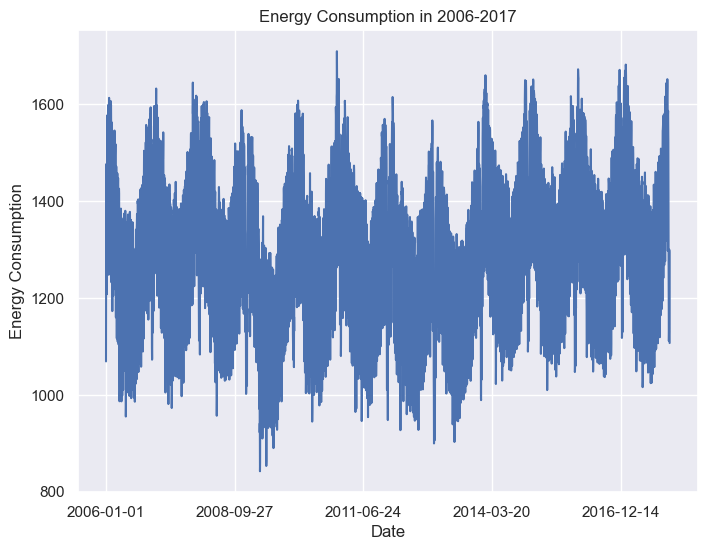

In [165]:
germany.Consumption.plot()
plt.title("Energy Consumption in 2006-2017")
plt.ylabel("Energy Consumption")
plt.show()

In [ ]:
# OR

In [81]:
# Define the URL of the OPSD dataset for Germany
url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"

# Use pandas to read the CSV data from the URL into a DataFrame
opsd_df  = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify the data
print(opsd_df.head())


         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN


# 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.



In [83]:
def opsd_germany_daily():
    """
    This function uses or creates the 
    opsd_germany_daily csv and returns a df.
    """
    if os.path.isfile('opsd_germany_daily.csv'):
        df = pd.read_csv('opsd_germany_daily.csv', index_col=0)
    else:
        url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
        df = pd.read_csv(url)
        df.to_csv('opsd_germany_daily.csv')
    return df

In [ ]:
def get_swapi_data(endpoint):
    """
    This function will:  
    - creates a csv of `endpoint` data if one does not exist
        - if one already exists, it uses the existing csv 
    - outputs data as a dataframe.
    
    endpoint formatting: "planets"
    
    """
    
    base_url = "https://swapi.dev/api/"
    
    if os.path.isfile(f"{endpoint}.csv"):
        df = pd.read_csv(f"{endpoint}.csv", index_col=0)
        
    else:
        response = requests.get(base_url + endpoint + "/")
        data = response.json()
        df = pd.DataFrame(data['results'])
        
        while data['next'] != None:
            print(data['next'])
            response = requests.get(data['next'])
            data = response.json()
            df = pd.concat([df, pd.DataFrame(data['results'])], ignore_index=True)
        df.to_csv(f"{endpoint}.csv")
        
    return df